# 1. Generate Dataset & Train Test Split

In [ ]:
import pandas as pd
import numpy as np

# Jumlah Data: 200 sampel
n_samples = 200

# 1. Generate Features (X)
luas_tanah = np.random.randint(50, 501, n_samples)
luas_bangunan = np.random.randint(30, 401, n_samples)
kamar_tidur = np.random.randint(1, 6, n_samples)
umur_bangunan = np.random.randint(0, 31, n_samples)
jarak_kota = np.random.randint(1, 21, n_samples)

# 2. Generate Target (y) dengan Hubungan NON-LINEAR
base_price = 200  # Harga dasar minimum
noise = np.random.normal(0, 50, n_samples) # Noise acak

# Formula BARU dengan non-linear relationship
harga_properti = (base_price + 
                  (luas_tanah * 2) + 
                  ((luas_bangunan ** 1.1) * 1.5) +  # <-- NON-LINEAR (A)
                  (kamar_tidur * 50) - 
                  (np.log(umur_bangunan + 1) * 45) - # <-- NON-LINEAR (B)
                  (jarak_kota * 10) +
                  noise)

# 3. Pastikan harga tetap dalam rentang 200 - 5000
harga_properti = np.clip(harga_properti, 200, 5000).astype(int)


# 4. Buat DataFrame dan Simpan ke CSV
data = {
    'Luas_Tanah_m2': luas_tanah,
    'Luas_Bangunan_m2': luas_bangunan,
    'Jumlah_Kamar_Tidur': kamar_tidur,
    'Umur_Bangunan_Tahun': umur_bangunan,
    'Jarak_Pusat_Kota_km': jarak_kota,
    'Harga_Properti_jutaRp': harga_properti
}

df = pd.DataFrame(data)

# Memberi nama file baru agar tidak tertukar
nama_file = 'dataset_properti_non_linear.csv'
df.to_csv(nama_file, index=False)

print(f"Dataset non-linear berhasil dibuat dengan {len(df)} sampel.")
print(f"Disimpan sebagai file: {nama_file}")
print("\n5 data pertama:")
print(df.head())

In [50]:
from sklearn.model_selection import train_test_split

dataset_properti = 'dataset_properti_non_linear.csv'

# 1. Muat dataset dari CSV
df = pd.read_csv(dataset_properti) # <-- Menggunakan variabel baru
print(f"Berhasil memuat {dataset_properti} dengan {len(df)} baris.") # <-- Menggunakan variabel baru

# 2. Pisahkan Fitur (X) dan Target (y)
# X adalah semua kolom KECUALI harga
X = df.drop('Harga_Properti_jutaRp', axis=1) 
# y adalah HANYA kolom harga
y = df['Harga_Properti_jutaRp']

# 3. Lakukan split 70% training dan 30% testing
# test_size=0.3 artinya 30% untuk testing (sehingga training-nya 70%)
# random_state=42 agar hasil splitnya konsisten jika kode dijalankan ulang
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# 4. Tampilkan hasil untuk konfirmasi
print("\n--- Hasil Pembagian Data ---")
print(f"Total baris data asli: {len(df)} (100%)")
print(f"Jumlah data training: {len(X_train)} baris (70%)")
print(f"Jumlah data testing: {len(X_test)} baris (30%)")

print("\nBentuk (shape) data:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Berhasil memuat dataset_properti_non_linear.csv dengan 200 baris.

--- Hasil Pembagian Data ---
Total baris data asli: 200 (100%)
Jumlah data training: 140 baris (70%)
Jumlah data testing: 60 baris (30%)

Bentuk (shape) data:
X_train shape: (140, 5)
X_test shape: (60, 5)
y_train shape: (140,)
y_test shape: (60,)


# 2. Data Preparation 

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle 

In [54]:
dataset_properti = 'dataset_properti_non_linear.csv'
df = pd.read_csv(dataset_properti)

print("--- B.1: Statistical Summary ---")
# Menampilkan mean, std, min, max, dll.
print(df.describe())
print("\n" + "="*30 + "\n")

--- B.1: Statistical Summary ---
       Luas_Tanah_m2  Luas_Bangunan_m2  Jumlah_Kamar_Tidur  Umur_Bangunan_Tahun  Jarak_Pusat_Kota_km  Harga_Properti_jutaRp
count        200.000           200.000             200.000              200.000              200.000                200.000
mean         287.340           216.260               2.910               15.175                9.910              1,268.375
std          122.153           111.852               1.401                8.587                5.579                412.484
min           50.000            30.000               1.000                0.000                1.000                320.000
25%          198.000           122.250               2.000                8.000                5.750                957.000
50%          288.000           204.500               3.000               15.000               10.000              1,250.500
75%          383.250           316.000               4.000               22.000               14.00

In [55]:
print("--- C.3: Pengecekan Missing Values ---")
print(df.isnull().sum())
print("\n" + "="*30 + "\n")

--- C.3: Pengecekan Missing Values ---
Luas_Tanah_m2            0
Luas_Bangunan_m2         0
Jumlah_Kamar_Tidur       0
Umur_Bangunan_Tahun      0
Jarak_Pusat_Kota_km      0
Harga_Properti_jutaRp    0
dtype: int64




--- B.2: Menampilkan Histogram (Distribusi Fitur) ---


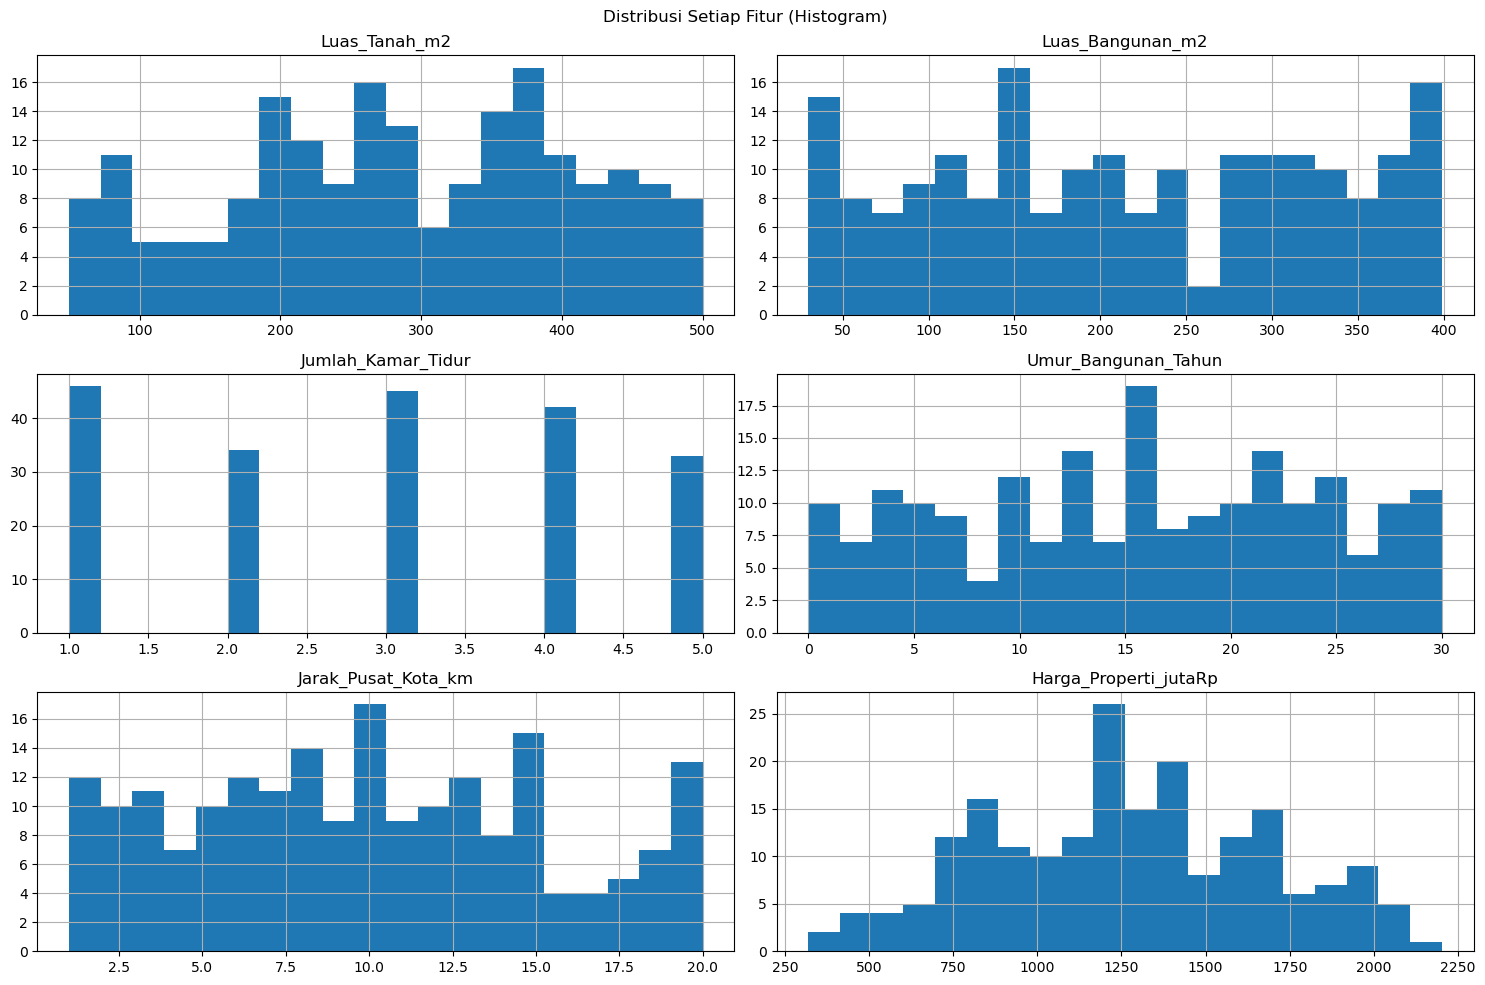

In [56]:
# Visualisasi Distribusi Fitur (Histogram)
print("--- B.2: Menampilkan Histogram (Distribusi Fitur) ---")
# Ini akan membuka jendela baru untuk menampilkan plot
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribusi Setiap Fitur (Histogram)")
plt.tight_layout()
plt.show() # Tampilkan plot

--- B.3: Menampilkan Scatter Plot (Fitur vs Harga) ---


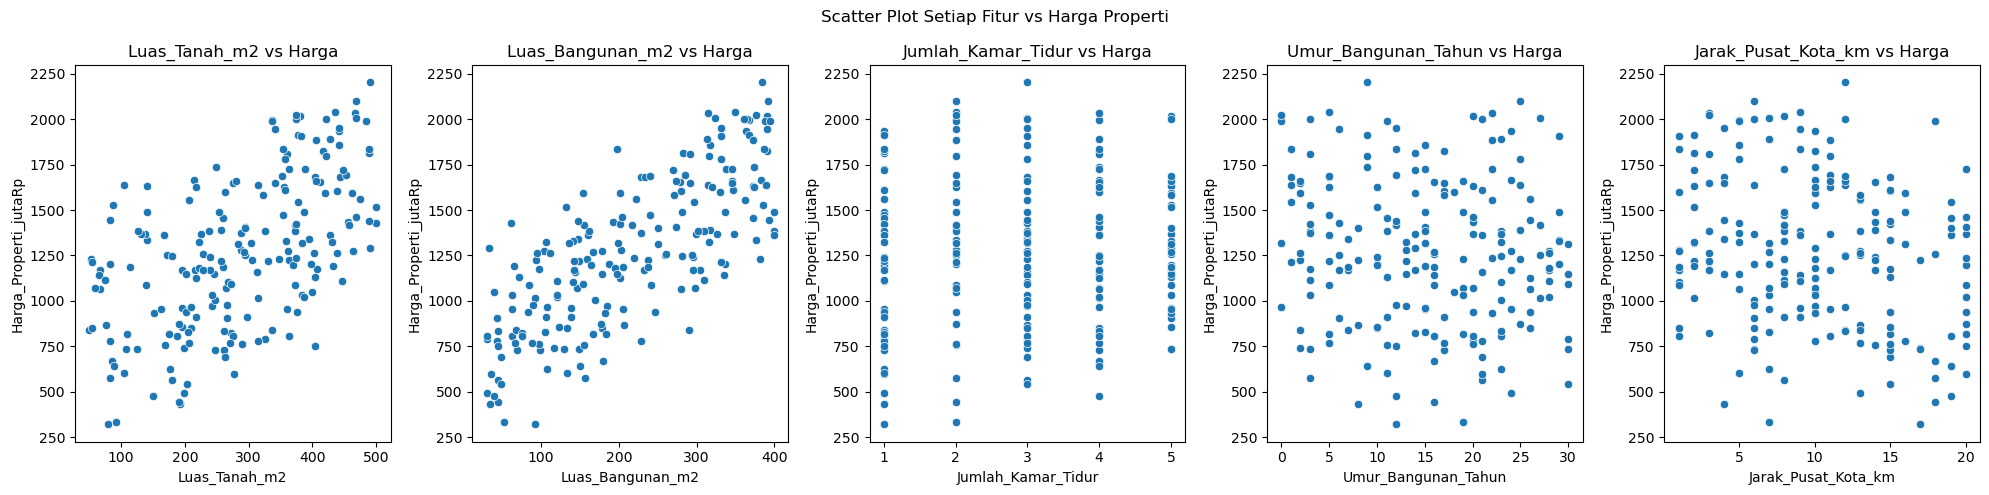

In [57]:
# Scatter Plot Setiap Fitur vs Harga
print("--- B.3: Menampilkan Scatter Plot (Fitur vs Harga) ---")
features = ['Luas_Tanah_m2', 'Luas_Bangunan_m2', 'Jumlah_Kamar_Tidur', 'Umur_Bangunan_Tahun', 'Jarak_Pusat_Kota_km']
target = 'Harga_Properti_jutaRp'

plt.figure(figsize=(20, 5))
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    sns.scatterplot(x=df[col], y=df[target])
    plt.title(f'{col} vs Harga')
plt.suptitle("Scatter Plot Setiap Fitur vs Harga Properti")
plt.tight_layout()
plt.show()

--- B.4: Menampilkan Correlation Matrix (Heatmap) ---


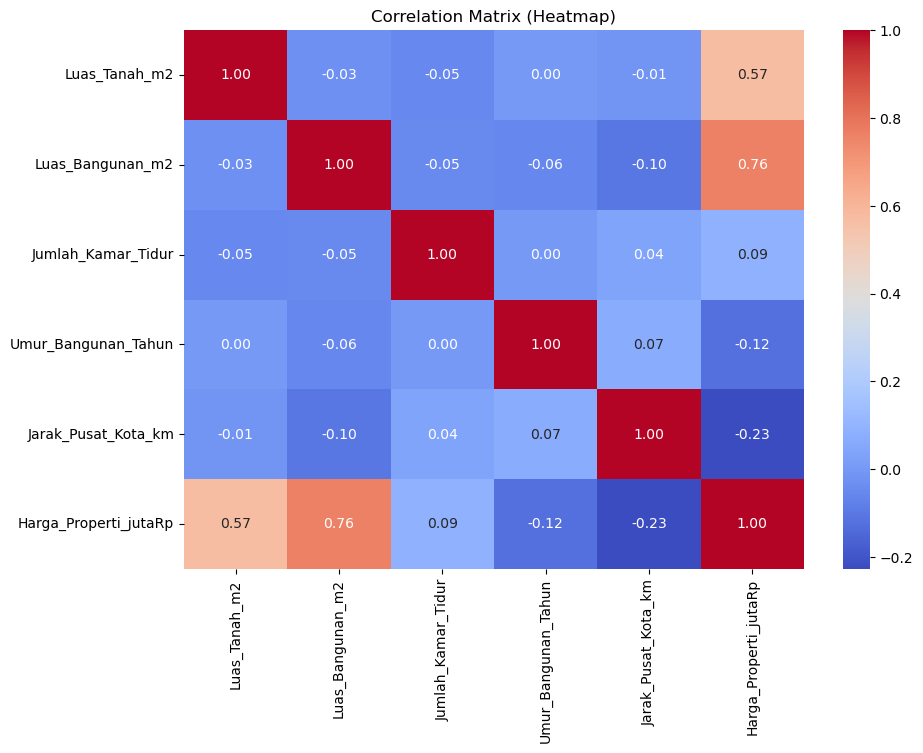

In [58]:
# Correlation Matrix (Heatmap)
print("--- B.4: Menampilkan Correlation Matrix (Heatmap) ---")
plt.figure(figsize=(10, 7))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Heatmap)")
plt.show()

--- B.5: Menampilkan Box Plot (Identifikasi Outliers) ---


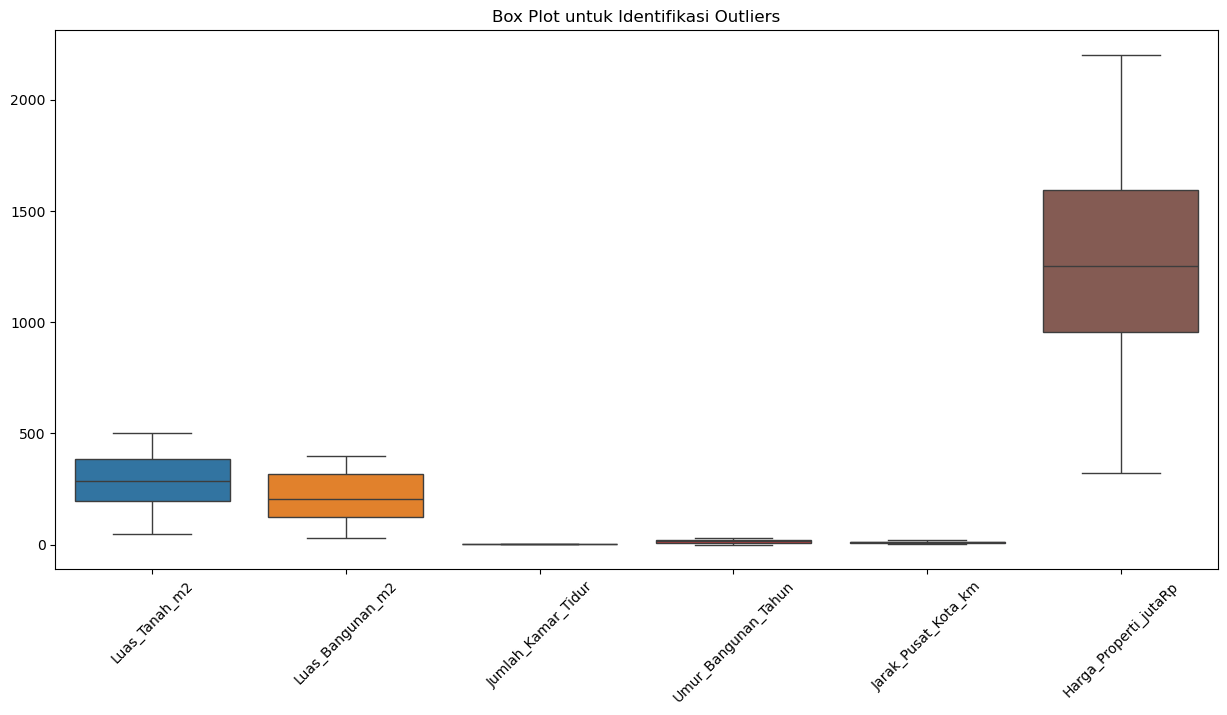

In [59]:
# Identifikasi Outliers (Box Plot)
print("--- B.5: Menampilkan Box Plot (Identifikasi Outliers) ---")
plt.figure(figsize=(15, 7))
sns.boxplot(data=df)
plt.title("Box Plot untuk Identifikasi Outliers")
plt.xticks(rotation=45)
plt.show()

In [60]:
# --- DATA PREPROCESSING ---

print("\n--- Split Data Train-Test (70:30) ---")
# Pisahkan Fitur (X) dan Target (y)
X = df.drop('Harga_Properti_jutaRp', axis=1) 
y = df['Harga_Properti_jutaRp']

# Lakukan split 70% training dan 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(f"Data dibagi:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print("\n" + "="*30 + "\n")


--- Split Data Train-Test (70:30) ---
Data dibagi:
X_train shape: (140, 5)
X_test shape: (60, 5)
y_train shape: (140,)
y_test shape: (60,)




In [61]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit HANYA pada data training
X_train_scaled = scaler.fit_transform(X_train)

# Transform (menerapkan) pada data testing
X_test_scaled = scaler.transform(X_test)

print("Data X_train sebelum scaling (5 baris pertama):")
print(X_train.head())
print("\nData X_train SETELAH scaling (5 baris pertama):")
print(X_train_scaled[:5])

Data X_train sebelum scaling (5 baris pertama):
     Luas_Tanah_m2  Luas_Bangunan_m2  Jumlah_Kamar_Tidur  Umur_Bangunan_Tahun  Jarak_Pusat_Kota_km
169            439               111                   2                   28                   13
97             198                31                   1                   24                   13
31             407                97                   4                    3                   15
12             341               391                   2                    6                    9
35              50               290                   1                    7                   12

Data X_train SETELAH scaling (5 baris pertama):
[[ 1.1622201  -0.99556459 -0.58293911  1.55245217  0.51283808]
 [-0.70525805 -1.69640202 -1.29882925  1.07842097  0.51283808]
 [ 0.9142562  -1.11821114  0.84884117 -1.41024281  0.86478578]
 [ 0.40283065  1.4573664  -0.58293911 -1.05471941 -0.19105732]
 [-1.85209111  0.57255915 -1.29882925 -0.93621161  0.3368

In [62]:
# --- Simpan scaler untuk digunakan saat prediksi ---
dataset_properti_scaler = 'scaler.pkl'
with open(dataset_properti_scaler, 'wb') as file:
    pickle.dump(scaler, file)

print(f"\nScaler berhasil disimpan ke file: {dataset_properti_scaler}")


Scaler berhasil disimpan ke file: scaler.pkl


# 3. Model Implementation

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [64]:
# Daftar degree yang akan diuji
degrees_to_test = [1, 2, 3, 4, 5]

# Kita akan simpan hasil transformasinya untuk langkah selanjutnya
# Ini adalah 'dictionary' untuk menyimpan X_train_poly[1], X_train_poly[2], dst.
X_train_poly_dict = {}
X_test_poly_dict = {}

for degree in degrees_to_test:
    # 1. Inisialisasi PolynomialFeatures
    #    include_bias=False agar tidak menambahkan kolom '1' (bias)
    #    karena model Regresi Linear akan menanganinya
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    
    # 2. Fit (belajar) dan transform HANYA pada data training
    X_train_poly = poly.fit_transform(X_train_scaled)
    
    # 3. Transform HANYA pada data testing (menggunakan 'poly' yg sudah di-fit)
    X_test_poly = poly.transform(X_test_scaled)
    
    # 4. Simpan hasil transformasi ke dictionary
    X_train_poly_dict[degree] = X_train_poly
    X_test_poly_dict[degree] = X_test_poly
    
    # 5. Tampilkan jumlah fitur yang dihasilkan
    num_features = X_train_poly.shape[1]
    print(f"Degree {degree}: Menghasilkan {num_features} fitur")


Degree 1: Menghasilkan 5 fitur
Degree 2: Menghasilkan 20 fitur
Degree 3: Menghasilkan 55 fitur
Degree 4: Menghasilkan 125 fitur
Degree 5: Menghasilkan 251 fitur


In [65]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings

In [66]:
#Matikan warning, terutama ConvergenceWarning dari Lasso
warnings.filterwarnings('ignore')

In [67]:
# Daftar alpha untuk diuji
alphas = [0.1, 1, 10]

# Dictionary untuk menyimpan semua (35) model yang sudah dilatih
trained_models = {}

# Mulai perulangan (loop)
for degree in degrees_to_test:
    print(f"\nMelatih model untuk Degree {degree}...")
    
    # Ambil data X_train yang sesuai untuk degree ini
    X_train_poly = X_train_poly_dict[degree]
    
    # Buat sub-dictionary untuk menyimpan model di degree ini
    trained_models[degree] = {}
    
    # 1. Linear Regression (Tanpa Regularization)
    model_lr = LinearRegression()
    model_lr.fit(X_train_poly, y_train)
    trained_models[degree]['LinearRegression'] = model_lr
    
    # 2. Ridge Regression (L2 Regularization)
    for alpha in alphas:
        # max_iter untuk memastikan konvergensi
        model_ridge = Ridge(alpha=alpha, max_iter=10000) 
        model_ridge.fit(X_train_poly, y_train)
        trained_models[degree][f'Ridge (alpha={alpha})'] = model_ridge
        
    # 3. Lasso Regression (L1 Regularization)
    for alpha in alphas:
        # max_iter sangat penting untuk Lasso
        model_lasso = Lasso(alpha=alpha, max_iter=10000) 
        model_lasso.fit(X_train_poly, y_train)
        trained_models[degree][f'Lasso (alpha={alpha})'] = model_lasso

print("\n--- Pelatihan Model Selesai ---")
print("Semua 35 model telah dilatih dan disimpan dalam variabel 'trained_models'.")

# Tampilkan contoh isi dictionary
print("\nContoh model yang tersimpan:")
print(f"Model untuk Degree 2: {list(trained_models[2].keys())}")
print(f"Model untuk Degree 5: {list(trained_models[5].keys())}")


Melatih model untuk Degree 1...

Melatih model untuk Degree 2...

Melatih model untuk Degree 3...

Melatih model untuk Degree 4...

Melatih model untuk Degree 5...

--- Pelatihan Model Selesai ---
Semua 35 model telah dilatih dan disimpan dalam variabel 'trained_models'.

Contoh model yang tersimpan:
Model untuk Degree 2: ['LinearRegression', 'Ridge (alpha=0.1)', 'Ridge (alpha=1)', 'Ridge (alpha=10)', 'Lasso (alpha=0.1)', 'Lasso (alpha=1)', 'Lasso (alpha=10)']
Model untuk Degree 5: ['LinearRegression', 'Ridge (alpha=0.1)', 'Ridge (alpha=1)', 'Ridge (alpha=10)', 'Lasso (alpha=0.1)', 'Lasso (alpha=1)', 'Lasso (alpha=10)']


# 4. Model Evaluation 

In [68]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [69]:
# List untuk menyimpan hasil
results_list = []

# Loop 1: Melalui setiap degree (1, 2, 3, 4, 5)
for degree in trained_models.keys():
    
    # Loop 2: Melalui setiap model di dalam degree itu (Linear, Ridge, Lasso)
    for model_name, model in trained_models[degree].items():
        
        # 1. Ambil data X yang sesuai untuk degree ini
        X_train_poly = X_train_poly_dict[degree]
        X_test_poly = X_test_poly_dict[degree]
        
        # 2. Buat prediksi di data TRAIN dan TEST
        y_pred_train = model.predict(X_train_poly)
        y_pred_test = model.predict(X_test_poly)
        
        # 3. Hitung semua metrik untuk TRAIN SET
        r2_train = r2_score(y_train, y_pred_train)
        mse_train = mean_squared_error(y_train, y_pred_train)
        rmse_train = np.sqrt(mse_train) # RMSE adalah akar dari MSE
        mae_train = mean_absolute_error(y_train, y_pred_train)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
        
        # 4. Hitung semua metrik untuk TEST SET
        r2_test = r2_score(y_test, y_pred_test)
        mse_test = mean_squared_error(y_test, y_pred_test)
        rmse_test = np.sqrt(mse_test) # RMSE adalah akar dari MSE
        mae_test = mean_absolute_error(y_test, y_pred_test)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
        
        # 5. Simpan semua hasil ini ke dalam list
        results_list.append({
            'Degree': degree,
            'Model': model_name,
            'Train R2': r2_train,
            'Test R2': r2_test,
            'Train RMSE': rmse_train,
            'Test RMSE': rmse_test,
            'Train MAE': mae_train,
            'Test MAE': mae_test,
            'Train MAPE': mape_train,
            'Test MAPE': mape_test,
            'Train MSE': mse_train,
            'Test MSE': mse_test,
        })



In [70]:
results_df = pd.DataFrame(results_list)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:,.3f}'.format) # Tampilkan 3 angka desimal
cols_to_show = ['Degree', 'Model', 'Train R2', 'Test R2', 'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE']
print(results_df[cols_to_show].sort_values(by='Test R2', ascending=False))

# Simpan tabel lengkap ke file CSV
results_df.to_csv('model_evaluation_results.csv', index=False)
print("\n--- Bagian 3.A Selesai ---")
print("Hasil evaluasi lengkap juga disimpan ke 'model_evaluation_results.csv'")

    Degree              Model  Train R2  Test R2  Train RMSE  Test RMSE  Train MAE  Test MAE
12       2    Lasso (alpha=1)     0.983    0.983      55.394     47.153     43.756    36.539
9        2    Ridge (alpha=1)     0.983    0.983      55.299     47.617     44.003    36.321
11       2  Lasso (alpha=0.1)     0.983    0.983      55.207     47.676     43.801    36.498
2        1    Ridge (alpha=1)     0.981    0.983      59.157     47.703     47.523    39.475
8        2  Ridge (alpha=0.1)     0.983    0.983      55.205     47.737     43.854    36.509
5        1    Lasso (alpha=1)     0.981    0.983      59.119     47.745     47.349    39.297
7        2   LinearRegression     0.983    0.983      55.204     47.761     43.842    36.530
13       2   Lasso (alpha=10)     0.979    0.983      62.487     47.766     50.939    38.674
1        1  Ridge (alpha=0.1)     0.981    0.982      59.078     48.096     47.169    39.410
4        1  Lasso (alpha=0.1)     0.981    0.982      59.077     48.10

In [71]:
# --- PERSIAPAN: Menyiapkan semua variabel ---

try:
    results_df
except NameError:
    print("Memuat ulang results_df dari file...")
    results_df = pd.read_csv('model_evaluation_results.csv')

try:
    trained_models
except NameError:
    print("Error: Variabel 'trained_models' tidak ditemukan.")
    # (Dalam skrip nyata, Anda perlu me-load ulang model atau melatih ulang)

# Muat data X dan y
nama_file = 'dataset_properti_non_linear.csv'
df = pd.read_csv(nama_file)
X = df.drop('Harga_Properti_jutaRp', axis=1) 
y = df['Harga_Properti_jutaRp']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Scale
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Siapkan Poly Features (Kita butuh 'poly' object-nya)
poly_objects = {}
X_train_poly_dict = {}
X_test_poly_dict = {}
for degree in [1, 2, 3, 4, 5]:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    poly_objects[degree] = poly # <-- Simpan object poly-nya
    X_train_poly_dict[degree] = X_train_poly
    X_test_poly_dict[degree] = X_test_poly

Model Optimal Pilihan untuk visualisasi: Degree 2, Lasso (alpha=1)

Menampilkan Plot 1: Actual vs Predicted...


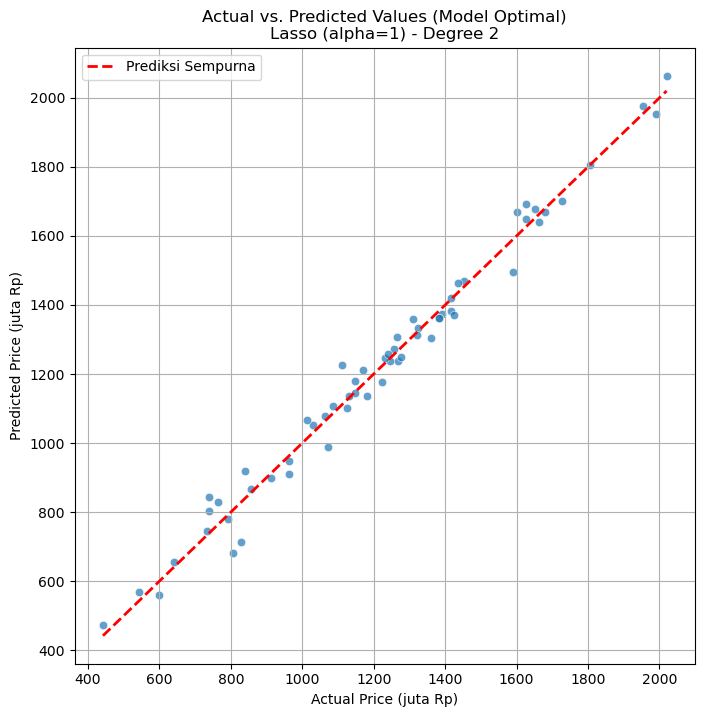


Menampilkan Plot 2: Residual Plot...


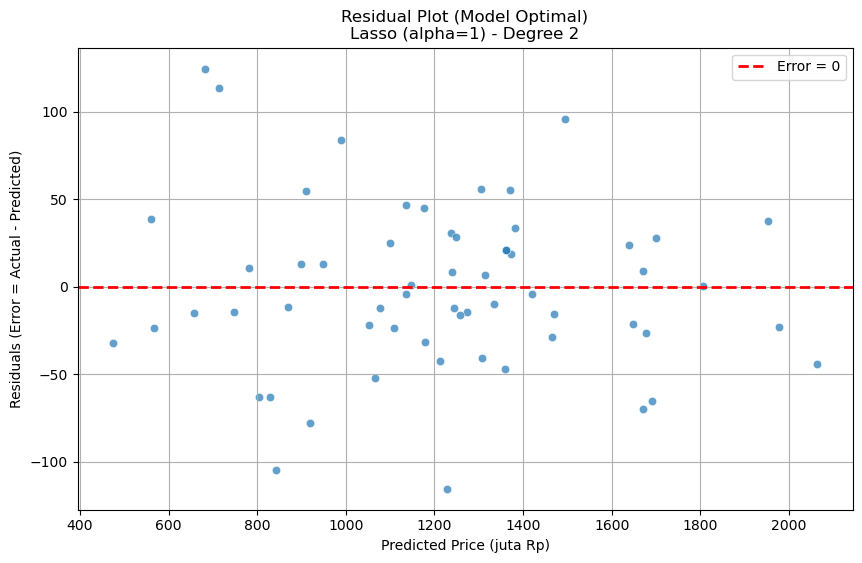


Menampilkan Plot 3: Polynomial Curve Fit...


In [72]:
# --- Memilih Model Optimal ---
# Kita cari model dengan Test R2 tertinggi, tapi HINDARI model LinearRegression di degree > 2
# karena itu hampir pasti overfitting. Kita prioritaskan Ridge/Lasso.
valid_models_df = results_df[~((results_df['Model'] == 'LinearRegression') & (results_df['Degree'] > 2))]
best_model_stats = valid_models_df.sort_values(by='Test R2', ascending=False).iloc[0]

best_degree = int(best_model_stats['Degree'])
best_model_name = best_model_stats['Model']
optimal_model = trained_models[best_degree][best_model_name]
X_test_optimal_poly = X_test_poly_dict[best_degree]
y_pred_optimal = optimal_model.predict(X_test_optimal_poly)

print(f"Model Optimal Pilihan untuk visualisasi: Degree {best_degree}, {best_model_name}")


# --- 1. Plot Predicted vs Actual Values ---
print("\nMenampilkan Plot 1: Actual vs Predicted...")
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred_optimal, alpha=0.7)
# Garis 45 derajat (prediksi sempurna)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Prediksi Sempurna')
plt.title(f'Actual vs. Predicted Values (Model Optimal)\n{best_model_name} - Degree {best_degree}')
plt.xlabel('Actual Price (juta Rp)')
plt.ylabel('Predicted Price (juta Rp)')
plt.legend()
plt.grid(True)
plt.show()

# --- 2. Residual Plot ---
print("\nMenampilkan Plot 2: Residual Plot...")
residuals = y_test - y_pred_optimal
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_optimal, y=residuals, alpha=0.7)
# Garis 0 (tidak ada error)
plt.axhline(y=0, color='r', linestyle='--', lw=2, label='Error = 0')
plt.title(f'Residual Plot (Model Optimal)\n{best_model_name} - Degree {best_degree}')
plt.xlabel('Predicted Price (juta Rp)')
plt.ylabel('Residuals (Error = Actual - Predicted)')
plt.legend()
plt.grid(True)
plt.show()

# --- 3. Plot Polynomial Curve (1 Fitur Penting) ---
print("\nMenampilkan Plot 3: Polynomial Curve Fit...")
fitur_penting = 'Luas_Bangunan_m2'


Menampilkan Plot 3: Polynomial Curve Fit...


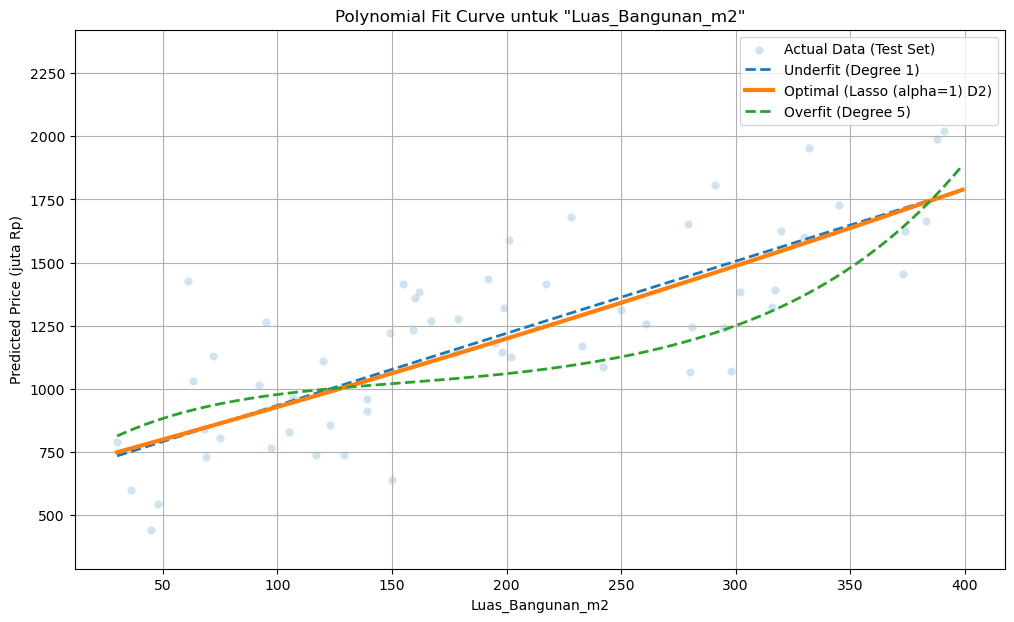


Menampilkan Plot 4: Perbandingan R² Score...


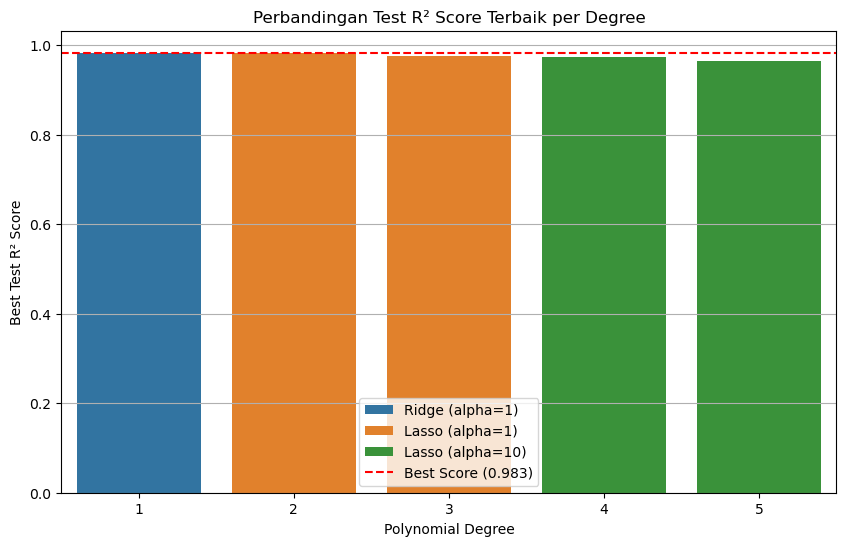

In [73]:
print("\nMenampilkan Plot 3: Polynomial Curve Fit...")
fitur_penting = 'Luas_Bangunan_m2'

# 1. Buat data dummy:
#    Ambil rata-rata dari semua fitur (dari data training)
feature_means = X_train.mean().to_dict()
# Buat 100 nilai untuk fitur_penting
dummy_range = np.linspace(X[fitur_penting].min(), X[fitur_penting].max(), 100)
# Buat 100 baris data dummy
dummy_df = pd.DataFrame([feature_means] * 100) 
dummy_df[fitur_penting] = dummy_range # Ganti kolom fitur_penting
dummy_df = dummy_df[X.columns] # Pastikan urutan kolom sama

# 2. Scale data dummy
dummy_scaled = scaler.transform(dummy_df)

# 3. Buat plot
plt.figure(figsize=(12, 7))
# Plot data aslinya (test set) sebagai latar belakang
sns.scatterplot(x=X_test[fitur_penting], y=y_test, alpha=0.2, label='Actual Data (Test Set)')

# Model yang akan di-plot kurvanya
models_to_plot = {
    'Underfit (Degree 1)': trained_models[1]['LinearRegression'],
    'Optimal': optimal_model,
    'Overfit (Degree 5)': trained_models[5]['LinearRegression']
}
degrees_for_plot = [1, best_degree, 5]

for (label, model), degree in zip(models_to_plot.items(), degrees_for_plot):
    # Ambil object poly yang sesuai
    poly_transform = poly_objects[degree]
    
    # Transform data dummy
    dummy_poly = poly_transform.transform(dummy_scaled)
    
    # Buat prediksi
    y_pred_curve = model.predict(dummy_poly)
    
    # Plot kurvanya
    if label == 'Optimal':
        plt.plot(dummy_range, y_pred_curve, lw=3, label=f'Optimal ({best_model_name} D{best_degree})')
    else:
        plt.plot(dummy_range, y_pred_curve, lw=2, linestyle='--', label=label)

plt.title(f'Polynomial Fit Curve untuk "{fitur_penting}"')
plt.xlabel(fitur_penting)
plt.ylabel('Predicted Price (juta Rp)')
plt.legend()
plt.ylim(y.min()*0.9, y.max()*1.1) # Batasi sumbu Y
plt.grid(True)
plt.show()

# --- 4. Comparison Plot: R² Score ---
print("\nMenampilkan Plot 4: Perbandingan R² Score...")
# Ambil R2 terbaik untuk setiap degree
best_r2_per_degree = results_df.loc[results_df.groupby('Degree')['Test R2'].idxmax()]

plt.figure(figsize=(10, 6))
sns.barplot(data=best_r2_per_degree, x='Degree', y='Test R2', hue='Model', dodge=False)
plt.title('Perbandingan Test R² Score Terbaik per Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Best Test R² Score')
plt.axhline(y=best_model_stats['Test R2'], color='r', linestyle='--', label=f'Best Score ({best_model_stats["Test R2"]:.3f})')
plt.legend()
plt.grid(axis='y')
plt.show()

# 4. Regularization Analysis 

In [74]:
import seaborn as sns

In [75]:
degree_to_analyze = 3
poly = PolynomialFeatures(degree=degree_to_analyze, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"--- Persiapan Data Selesai ---")
print(f"Menggunakan Polynomial Degree {degree_to_analyze}")
print(f"Jumlah Fitur: {X_train_poly.shape[1]}\n")

--- Persiapan Data Selesai ---
Menggunakan Polynomial Degree 3
Jumlah Fitur: 55



In [76]:
print(f"--- Melatih model di Degree {degree_to_analyze} dengan berbagai Alpha ---")

# Daftar alpha baru yang akan diuji
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# List untuk menyimpan hasil
reg_results_list = []

for alpha in alphas:
    # 1. Latih Ridge
    model_ridge = Ridge(alpha=alpha, max_iter=10000).fit(X_train_poly, y_train)
    y_pred_train_ridge = model_ridge.predict(X_train_poly)
    y_pred_test_ridge = model_ridge.predict(X_test_poly)
    
    # 2. Latih Lasso
    model_lasso = Lasso(alpha=alpha, max_iter=10000).fit(X_train_poly, y_train)
    y_pred_train_lasso = model_lasso.predict(X_train_poly)
    y_pred_test_lasso = model_lasso.predict(X_test_poly)
    
    # 3. Simpan hasil Ridge
    reg_results_list.append({
        'Model': 'Ridge',
        'Alpha': alpha,
        'Train R2': r2_score(y_train, y_pred_train_ridge),
        'Test R2': r2_score(y_test, y_pred_test_ridge)
    })
    
    # 4. Simpan hasil Lasso
    reg_results_list.append({
        'Model': 'Lasso',
        'Alpha': alpha,
        'Train R2': r2_score(y_train, y_pred_train_lasso),
        'Test R2': r2_score(y_test, y_pred_test_lasso)
    })

--- Melatih model di Degree 3 dengan berbagai Alpha ---


Tabel Hasil R2 Score vs Alpha:
    Model   Alpha  Train R2  Test R2
0   Ridge   0.001     0.988    0.967
1   Lasso   0.001     0.988    0.967
2   Ridge   0.010     0.988    0.967
3   Lasso   0.010     0.988    0.967
4   Ridge   0.100     0.988    0.967
5   Lasso   0.100     0.988    0.968
6   Ridge   1.000     0.988    0.967
7   Lasso   1.000     0.987    0.976
8   Ridge  10.000     0.975    0.945
9   Lasso  10.000     0.978    0.972
10  Ridge 100.000     0.938    0.912
11  Lasso 100.000     0.762    0.728

--- Menampilkan Plot R² vs Alpha ---


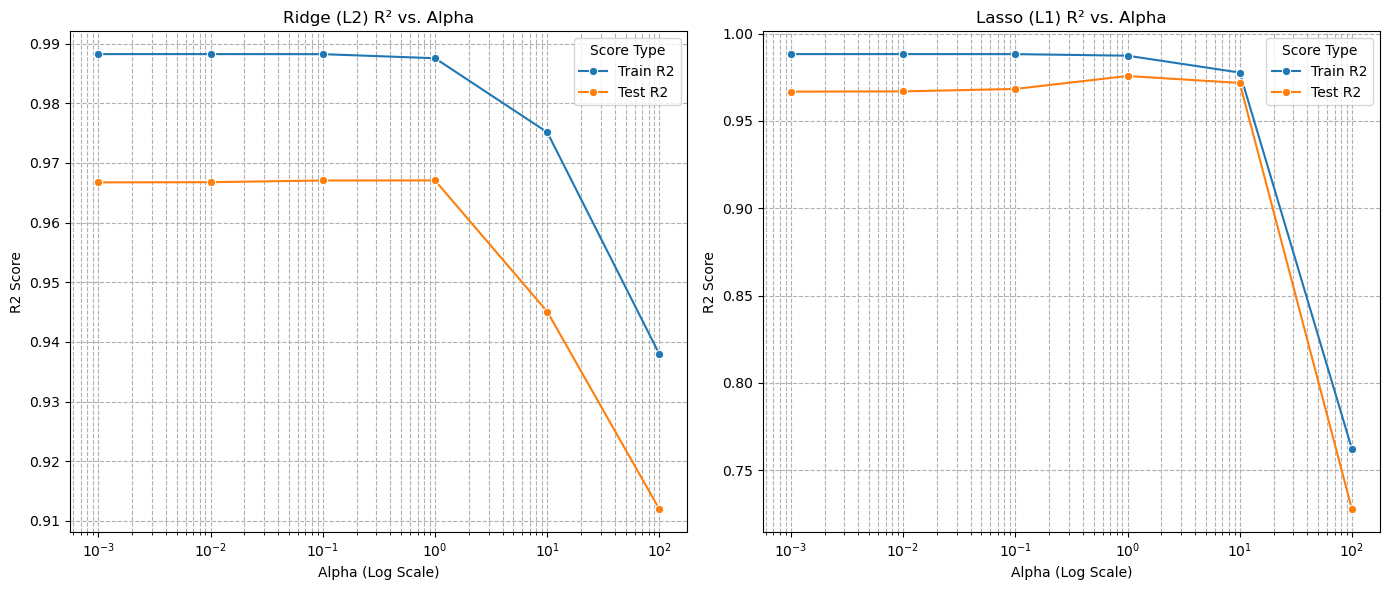

In [77]:
reg_results_df = pd.DataFrame(reg_results_list)

print("Tabel Hasil R2 Score vs Alpha:")
print(reg_results_df.to_string()) # Tampilkan semua hasil


# --- Plot R² score vs alpha ---
print("\n--- Menampilkan Plot R² vs Alpha ---")

# Kita 'melt' data agar mudah di-plot
plot_data = reg_results_df.melt(
    id_vars=['Model', 'Alpha'], 
    value_vars=['Train R2', 'Test R2'], 
    var_name='Score Type', 
    value_name='R2 Score'
)

plt.figure(figsize=(14, 6))

# Buat 2 plot: 1 untuk Ridge, 1 untuk Lasso
# Plot 1: Ridge
plt.subplot(1, 2, 1)
ridge_data = plot_data[plot_data['Model'] == 'Ridge']
sns.lineplot(data=ridge_data, x='Alpha', y='R2 Score', hue='Score Type', marker='o')
plt.xscale('log') # Sumbu X wajib 'log scale'
plt.title('Ridge (L2) R² vs. Alpha')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('R2 Score')
plt.grid(True, which="both", ls="--")

# Plot 2: Lasso
plt.subplot(1, 2, 2)
lasso_data = plot_data[plot_data['Model'] == 'Lasso']
sns.lineplot(data=lasso_data, x='Alpha', y='R2 Score', hue='Score Type', marker='o')
plt.xscale('log') # Sumbu X wajib 'log scale'
plt.title('Lasso (L1) R² vs. Alpha')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('R2 Score')
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

In [78]:
# Ini akan menghasilkan nama seperti 'Luas_Tanah_m2', 'Luas_Tanah_m2^2', 'Luas_Tanah_m2 Luas_Bangunan_m2', dll.
feature_names = poly.get_feature_names_out(X.columns)

print(f"--- Persiapan Data Selesai ---")
print(f"Menganalisis {len(feature_names)} fitur dari Degree {degree_to_analyze}.\n")

--- Persiapan Data Selesai ---
Menganalisis 55 fitur dari Degree 3.



In [79]:
# Latih model optimal 
# (Ridge Alpha=0.1, Lasso Alpha=1.0)
model_ridge = Ridge(alpha=0.1, max_iter=10000).fit(X_train_poly, y_train)
model_lasso = Lasso(alpha=1.0, max_iter=10000).fit(X_train_poly, y_train)

# 1. Tampilkan Koefisien: Buat DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Ridge_Coef': model_ridge.coef_,
    'Lasso_Coef': model_lasso.coef_
})

In [80]:
# Tambahkan nilai absolut untuk mempermudah sorting
coef_df['Abs_Ridge_Coef'] = coef_df['Ridge_Coef'].abs()
coef_df['Abs_Lasso_Coef'] = coef_df['Lasso_Coef'].abs()

pd.set_option('display.float_format', '{:,.4f}'.format) # Tampilkan 4 angka desimal

In [81]:
# 2. Identifikasi Fitur Paling Berpengaruh (Contoh: Top 10 dari Lasso)
print("--- Fitur Paling Berpengaruh (Berdasarkan Koefisien Lasso) ---")
top_features_lasso = coef_df.sort_values(by='Abs_Lasso_Coef', ascending=False)
print(top_features_lasso[['Feature', 'Lasso_Coef', 'Ridge_Coef']].head(10).to_string())

--- Fitur Paling Berpengaruh (Berdasarkan Koefisien Lasso) ---
                                   Feature  Lasso_Coef  Ridge_Coef
1                         Luas_Bangunan_m2    297.4736    297.2665
0                            Luas_Tanah_m2    261.1758    262.8625
2                       Jumlah_Kamar_Tidur     47.8685     71.4581
3                      Umur_Bangunan_Tahun    -39.4206    -58.5281
4                      Jarak_Pusat_Kota_km    -34.0485    -44.3428
10                      Luas_Bangunan_m2^2     15.6667     20.9737
37  Luas_Bangunan_m2^2 Umur_Bangunan_Tahun     14.2326     22.7534
36   Luas_Bangunan_m2^2 Jumlah_Kamar_Tidur     13.7491     15.1232
34     Luas_Tanah_m2 Jarak_Pusat_Kota_km^2    -12.8455    -18.6921
11     Luas_Bangunan_m2 Jumlah_Kamar_Tidur     12.4818     15.7820


In [82]:
# 3. Identifikasi Fitur yang Di-eliminasi Lasso
print("\n--- Fitur yang Di-eliminasi oleh Lasso (Koefisien = 0) ---")
eliminated_features = coef_df[coef_df['Lasso_Coef'] == 0]
print(f"Total {len(eliminated_features)} fitur dari {len(feature_names)} di-eliminasi (dibuat jadi 0) oleh Lasso.")
# Tampilkan beberapa contoh
print("Contoh fitur yang di-eliminasi:")
print(eliminated_features['Feature'].sample(min(10, len(eliminated_features))).to_string(index=False))


--- Fitur yang Di-eliminasi oleh Lasso (Koefisien = 0) ---
Total 11 fitur dari 55 di-eliminasi (dibuat jadi 0) oleh Lasso.
Contoh fitur yang di-eliminasi:
Luas_Tanah_m2 Umur_Bangunan_Tahun Jarak_Pusat_K...
                              Jumlah_Kamar_Tidur^3
            Jumlah_Kamar_Tidur Jarak_Pusat_Kota_km
                 Luas_Tanah_m2 Umur_Bangunan_Tahun
               Luas_Tanah_m2^2 Umur_Bangunan_Tahun
          Jumlah_Kamar_Tidur^2 Jarak_Pusat_Kota_km
Luas_Bangunan_m2 Umur_Bangunan_Tahun Jarak_Pusa...
         Umur_Bangunan_Tahun Jarak_Pusat_Kota_km^2
Luas_Tanah_m2 Jumlah_Kamar_Tidur Jarak_Pusat_Ko...
          Jumlah_Kamar_Tidur^2 Umur_Bangunan_Tahun



--- Menampilkan Plot Feature Importance ---


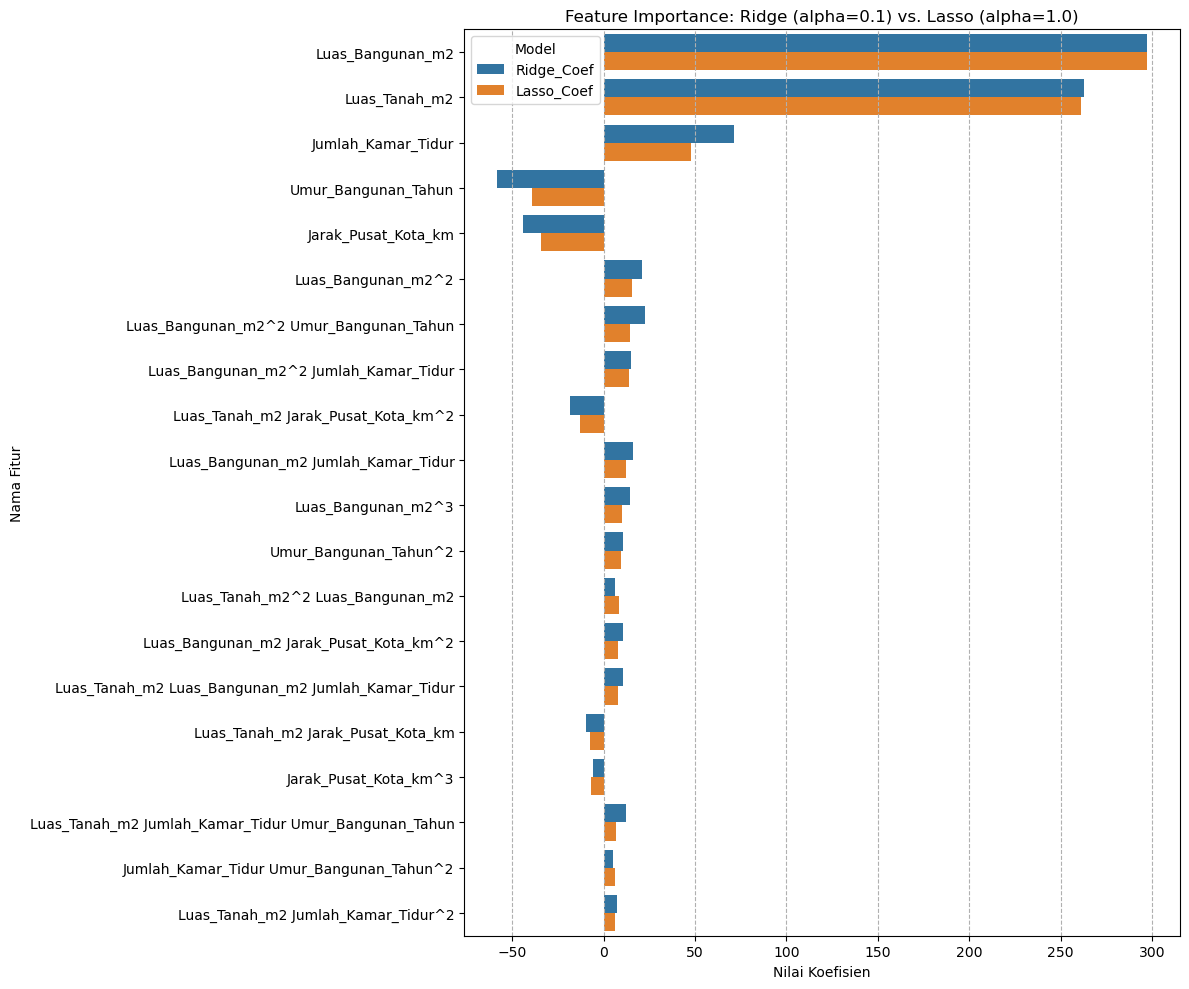

In [83]:
#Visualisasi Feature Importance (Top 20 Fitur)
print("\n--- Menampilkan Plot Feature Importance ---")
# Kita ambil Top 20 fitur paling penting (berdasarkan Lasso)
top_20_features = top_features_lasso.head(20)

# Kita 'melt' data agar bisa di-plot oleh seaborn
plot_data = top_20_features.melt(
    id_vars='Feature', 
    value_vars=['Ridge_Coef', 'Lasso_Coef'], 
    var_name='Model', 
    value_name='Coefficient'
)

plt.figure(figsize=(12, 10))
sns.barplot(
    data=plot_data, 
    y='Feature', 
    x='Coefficient', 
    hue='Model', 
    orient='h'
)
plt.title('Feature Importance: Ridge (alpha=0.1) vs. Lasso (alpha=1.0)')
plt.xlabel('Nilai Koefisien')
plt.ylabel('Nama Fitur')
plt.grid(True, axis='x', linestyle='--')
plt.tight_layout()
plt.show()

# 5. Model Selection & Prediction 

In [84]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import make_pipeline

In [85]:
degrees = [1, 2, 3, 4, 5]
alphas = [0.1, 1, 10]

In [86]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [87]:
cv_results_list = []

# --- 3. Loop Melalui Semua 35 Konfigurasi ---
for degree in degrees:
    
    # Konfigurasi Model 1: Linear Regression
    pipeline_lr = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        StandardScaler(),
        LinearRegression()
    )
    scores_lr = cross_validate(pipeline_lr, X, y, cv=kf,
                               scoring=('r2', 'neg_mean_squared_error'),
                               return_train_score=True)
    cv_results_list.append({
        'Degree': degree, 'Model': 'LinearRegression',
        'Train R2': scores_lr['train_r2'].mean(),
        'Test R2': scores_lr['test_r2'].mean(),
        'Train RMSE': np.sqrt(-scores_lr['train_neg_mean_squared_error'].mean()),
        'Test RMSE': np.sqrt(-scores_lr['test_neg_mean_squared_error'].mean())
    })

    # Konfigurasi Model 2 & 3: Ridge & Lasso
    for alpha in alphas:
        # Ridge
        pipeline_ridge = make_pipeline(
            PolynomialFeatures(degree=degree, include_bias=False),
            StandardScaler(),
            Ridge(alpha=alpha, max_iter=10000)
        )
        scores_ridge = cross_validate(pipeline_ridge, X, y, cv=kf,
                                      scoring=('r2', 'neg_mean_squared_error'),
                                      return_train_score=True)
        cv_results_list.append({
            'Degree': degree, 'Model': f'Ridge (alpha={alpha})',
            'Train R2': scores_ridge['train_r2'].mean(),
            'Test R2': scores_ridge['test_r2'].mean(),
            'Train RMSE': np.sqrt(-scores_ridge['train_neg_mean_squared_error'].mean()),
            'Test RMSE': np.sqrt(-scores_ridge['test_neg_mean_squared_error'].mean())
        })
        
        # Lasso
        pipeline_lasso = make_pipeline(
            PolynomialFeatures(degree=degree, include_bias=False),
            StandardScaler(),
            Lasso(alpha=alpha, max_iter=10000)
        )
        scores_lasso = cross_validate(pipeline_lasso, X, y, cv=kf,
                                      scoring=('r2', 'neg_mean_squared_error'),
                                      return_train_score=True)
        cv_results_list.append({
            'Degree': degree, 'Model': f'Lasso (alpha={alpha})',
            'Train R2': scores_lasso['train_r2'].mean(),
            'Test R2': scores_lasso['test_r2'].mean(),
            'Train RMSE': np.sqrt(-scores_lasso['train_neg_mean_squared_error'].mean()),
            'Test RMSE': np.sqrt(-scores_lasso['test_neg_mean_squared_error'].mean())
        })
    
    print(f"Selesai CV untuk Degree {degree}...")

Selesai CV untuk Degree 1...
Selesai CV untuk Degree 2...
Selesai CV untuk Degree 3...
Selesai CV untuk Degree 4...
Selesai CV untuk Degree 5...


In [88]:
cv_results_df = pd.DataFrame(cv_results_list)
# Buat kolom 'Gap' untuk analisis balance
cv_results_df['Gap (Train-Test R2)'] = cv_results_df['Train R2'] - cv_results_df['Test R2']

print("\n--- Tabel Hasil Akhir Cross-Validation (Rata-rata dari 5-Folds) ---")
pd.set_option('display.float_format', '{:,.3f}'.format)
cols_to_show = ['Degree', 'Model', 'Test R2', 'Train R2', 'Test RMSE', 'Gap (Train-Test R2)']
# Urutkan berdasarkan kriteria utama: Test R2 Tertinggi
print(cv_results_df.sort_values(by='Test R2', ascending=False)[cols_to_show].to_string())


# --- 5. Tentukan Model Terbaik & Jelaskan Reasoning ---
# Cari model dengan Test R2 tertinggi
best_model_stats = cv_results_df.loc[cv_results_df['Test R2'].idxmax()]

print("\n--- 5.A: Best Model Selection & Reasoning ---")
print("\n**Model Terbaik Pilihan:**")
print(f"  - Model: {best_model_stats['Model']}")
print(f"  - Degree: {best_model_stats['Degree']}")

print("\n**Metrik Kinerja (rata-rata K-Fold):**")
print(f"  - Highest Test R²: {best_model_stats['Test R2']:.3f}")
print(f"  - Lowest Test RMSE: {best_model_stats['Test RMSE']:.3f} (juta Rp)")
print(f"  - Train R²: {best_model_stats['Train R2']:.3f}")
print(f"  - Balance (Gap): {best_model_stats['Gap (Train-Test R2)']:.3f}")

print("\n**Reasoning (Penjelasan Pemilihan):**")
print(f"Model **{best_model_stats['Model']} (Degree {best_model_stats['Degree']})** dipilih sebagai model terbaik karena:")
print(f"1.  **Kinerja Test Tertinggi:** Model ini memberikan nilai **Test R² tertinggi** ({best_model_stats['Test R2']:.3f}) dan **Test RMSE terendah** ({best_model_stats['Test RMSE']:.3f}) di antara semua 35 konfigurasi, berdasarkan hasil rata-rata K-Fold CV yang robust.")
print(f"2.  **Balance (Keseimbangan) Terbaik:** Model ini menunjukkan keseimbangan performa train-test yang sangat baik. *Gap* (perbedaan) antara Train R² ({best_model_stats['Train R2']:.3f}) dan Test R² ({best_model_stats['Test R2']:.3f}) sangat kecil, yaitu hanya **{best_model_stats['Gap (Train-Test R2)']:.3f}**. Ini membuktikan model tidak mengalami *overfitting*.")
print("3.  **Perbandingan:** Model lain (terutama Degree 4 dan 5 tanpa regularisasi) mungkin memiliki Train R² yang sangat tinggi, tetapi Test R²-nya anjlok dan 'Gap'-nya besar, yang menunjukkan *overfitting* parah. Model ini adalah 'sweet spot' yang seimbang antara akurasi (low bias) dan generalisasi (low variance).")


--- Tabel Hasil Akhir Cross-Validation (Rata-rata dari 5-Folds) ---
    Degree              Model  Test R2  Train R2  Test RMSE  Gap (Train-Test R2)
2        1  Lasso (alpha=0.1)    0.980     0.982     57.250                0.002
0        1   LinearRegression    0.980     0.982     57.251                0.002
1        1  Ridge (alpha=0.1)    0.980     0.982     57.250                0.002
4        1    Lasso (alpha=1)    0.980     0.982     57.288                0.002
3        1    Ridge (alpha=1)    0.980     0.982     57.304                0.002
11       2    Lasso (alpha=1)    0.979     0.983     57.789                0.004
9        2  Lasso (alpha=0.1)    0.979     0.984     58.781                0.005
18       3    Lasso (alpha=1)    0.979     0.984     58.883                0.005
7        2   LinearRegression    0.978     0.984     58.947                0.006
8        2  Ridge (alpha=0.1)    0.978     0.984     59.020                0.006
25       4    Lasso (alpha=1)    0.978  

In [92]:
import joblib
from sklearn.pipeline import make_pipeline

# --- 1. Persiapan Data (Muat 100% Data) ---
# Kita akan melatih model final kita di SEMUA data
nama_file = 'UTS_ML/dataset_properti_non_linear.csv'
df = pd.read_csv(nama_file)
X = df.drop('Harga_Properti_jutaRp', axis=1) 
y = df['Harga_Properti_jutaRp']
print(f"Data {nama_file} (100% data) siap untuk pelatihan final.")

# --- 2. Tentukan Konfigurasi Model Terbaik ---
# Berdasarkan analisis kita di 3.A, 4.A, dan 5.A, model terbaik kita adalah:
BEST_DEGREE = 2
BEST_ALPHA = 1.0 
# (Model terbaik kita adalah Lasso(alpha=1.0) pada Degree 2)

# --- 3. Buat dan Latih Pipeline FINAL ---
# Pipeline secara otomatis akan melakukan:
# 1. PolynomialFeatures(degree=2)
# 2. StandardScaler()
# 3. Lasso(alpha=1.0)
final_pipeline = make_pipeline(
    PolynomialFeatures(degree=BEST_DEGREE, include_bias=False),
    StandardScaler(),
    Lasso(alpha=BEST_ALPHA, max_iter=10000)
)

# Latih pipeline ini pada SEMUA data (X dan y)
print("Melatih model final pada 100% data...")
final_pipeline.fit(X, y)
print("Model final selesai dilatih.")

# --- 4. Simpan Model Terbaik (Bagian dari 5.B) ---
model_filename = 'model_harga_properti_terbaik.joblib'
joblib.dump(final_pipeline, model_filename)

print(f"\nModel pipeline terbaik berhasil disimpan sebagai: {model_filename}")
print("="*40 + "\n")


# --- 5. Buat Fungsi Prediksi & Tes dengan Data Baru (Bagian dari 5.B) ---

# Buat 5 data baru (unseen data)
# INI PENTING: Kolom harus SAMA PERSIS dengan X (data training asli)
data_baru_mentah = pd.DataFrame({
    'Luas_Tanah_m2': [120, 500, 80, 250, 300],
    'Luas_Bangunan_m2': [100, 350, 60, 150, 200],
    'Jumlah_Kamar_Tidur': [3, 5, 2, 4, 4],
    'Umur_Bangunan_Tahun': [5, 1, 20, 0, 10],
    'Jarak_Pusat_Kota_km': [3, 15, 5, 2, 8]
}, columns=X.columns) # Memastikan urutan kolom sama

# Buat fungsi prediksi
def prediksi_harga(data_input_mentah):
    # 1. Muat model yang sudah disimpan
    try:
        model = joblib.load(model_filename)
    except FileNotFoundError:
        return "ERROR: File model tidak ditemukan. Latih ulang model."
    
    # 2. Lakukan prediksi
    #    Pipeline akan otomatis meng-handle scaling dan polynomial
    harga_prediksi = model.predict(data_input_mentah)
    
    # 3. Format hasil
    data_hasil = data_input_mentah.copy()
    # Bulatkan hasil prediksi
    data_hasil['Prediksi_Harga_jutaRp'] = np.round(harga_prediksi, 1)
    
    return data_hasil

# --- 6. Tampilkan Hasil Prediksi ---
print("--- 5.B: Hasil Prediksi pada 5 Data Baru ---")
hasil_prediksi = prediksi_harga(data_baru_mentah)
print(hasil_prediksi.to_string())

print("\n--- Penjelasan Confidence Interval ---")
print("Catatan: Menghitung 'confidence interval' (CI) untuk prediksi model Lasso")
print("secara langsung di scikit-learn cukup rumit (memerlukan bootstrapping")
print("atau library statistik lain seperti statsmodels).")
print("Hasil di atas adalah prediksi titik (point estimate) terbaik dari model.")

Data UTS_ML/dataset_properti_non_linear.csv (100% data) siap untuk pelatihan final.
Melatih model final pada 100% data...
Model final selesai dilatih.

Model pipeline terbaik berhasil disimpan sebagai: model_harga_properti_terbaik.joblib

--- 5.B: Hasil Prediksi pada 5 Data Baru ---
   Luas_Tanah_m2  Luas_Bangunan_m2  Jumlah_Kamar_Tidur  Umur_Bangunan_Tahun  Jarak_Pusat_Kota_km  Prediksi_Harga_jutaRp
0            120               100                   3                    5                    3                707.000
1            500               350                   5                    1                   15              2,199.200
2             80                60                   2                   20                    5                415.000
3            250               150                   4                    0                    2              1,182.000
4            300               200                   4                   10                    8              1,326.